# Doberitz K-Means NDVI

In [4]:
from argparse import ArgumentParser
from dataclasses import dataclass, field
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from typing import List

In [5]:
from kmeans_ndvi import KMeansNDVI, info_message

In [6]:
@dataclass
class Params:
    """Class for KMeansNDVI Input Params"""
    geojson: str = 'doberitz_multipolygon.geojson'
    scene_id: str = None
    band_names: List[str] = field(default_factory=lambda: ['B04', 'B08'])
    collection: str = 'sentinel-s2-l2a'
    start_date: str = '2020-01-01'
    end_date: str = '2020-02-01'
    cloud_cover: float = 1
    n_sig: int = 10
    download: bool = True
    env_filename: str = '.env'
    n_clusters: int = 5
    quantile_range: List[int] = field(default_factory=lambda: [1, 99])
    verbose: bool = False
    verbose_plot: bool = False
    quiet: bool = True

clargs = Params()

In [7]:
load_dotenv(clargs.env_filename);

In [8]:
info_message("Generate JP2 KMeansNDVI Instance")
jp2_data = KMeansNDVI(
    geojson=clargs.geojson,
    start_date=clargs.start_date,
    end_date=clargs.end_date,
    cloud_cover=clargs.cloud_cover,
    collection=clargs.collection,
    band_names=[band_name_.upper() for band_name_ in clargs.band_names],
    download=clargs.download,
    n_clusters=clargs.n_clusters,
    n_sig=clargs.n_sig,
    quantile_range=clargs.quantile_range,
    verbose=clargs.verbose,
    verbose_plot=clargs.verbose_plot,
    quiet=clargs.quiet
)

INFO | utils.py:23 in info_message()
       message: 'Generate JP2 KMeansNDVI Instance'


In [9]:
info_message(jp2_data)

INFO | utils.py:23 in info_message()
       message: SentinelAOI: 
                            AOI: doberitz_multipolygon.geojson
                     Start Date: 2020-01-01
                       End Date: 2020-02-01
                Cloud Cover Max: 1
                     Collection: sentinel-s2-l2a
                     Band Names: ['B04', 'B08']


In [10]:
info_message("Downloading and acquiring images")
jp2_data.download_and_acquire_images()

INFO | utils.py:23 in info_message()
       message: 'Downloading and acquiring images'


In [11]:
info_message("Loading JP2 files into data structure")
jp2_data.load_data_into_struct()

INFO | utils.py:23 in info_message()
       message: 'Loading JP2 files into data structure'


In [12]:
info_message("Computing NDVI for all scenes")
jp2_data.compute_ndvi_for_all()

INFO | utils.py:23 in info_message()
       message: 'Computing NDVI for all scenes'
/home/jonathan/anaconda3/envs/up42/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/mnt/d/Research/Jobs/Jobs2021/Up42/DataScienceChallenge/kmeans_doberitz_sentinel_up42/kmeans_ndvi/utils.py:233: RuntimeWarning: invalid value encountered in true_divide
  ndvi_masked = np.true_divide(


In [13]:
info_message("Allocating NDVI time series")
jp2_data.allocate_ndvi_timeseries()

INFO | utils.py:23 in info_message()
       message: 'Allocating NDVI time series'


In [14]:
info_message("Computing spatial K-Means for each scene NDVI")
jp2_data.compute_spatial_kmeans()

INFO | utils.py:23 in info_message()
       message: 'Computing spatial K-Means for each scene NDVI'
WARNING | utils.py:28 in warning_message()
          message: 'NDVI cannot be computed without both Band04 and Band08'
WARNING | utils.py:28 in warning_message()
          message: 'NDVI cannot be computed without both Band04 and Band08'


In [15]:
info_message("Computing temporal K-Means for each scene NDVIs over time")
jp2_data.compute_temporal_kmeans()

INFO | utils.py:23 in info_message()
       message: 'Computing temporal K-Means for each scene NDVIs over time'


# Examine the Results

In [16]:
from kmeans_ndvi.utils import sanity_check_ndvi_statistics

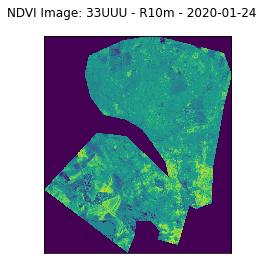

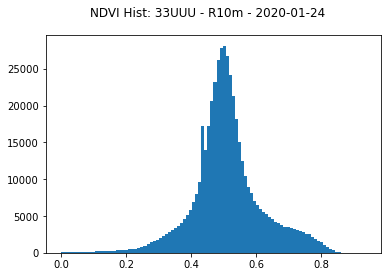

In [18]:
scene_id = '33UUU'
res = 'R10m'
date = '2020-01-24'
image = jp2_data.scenes[scene_id][res][date]['ndvi']
sanity_check_ndvi_statistics(image, scene_id, res, date, bins=100, plot_now=True)

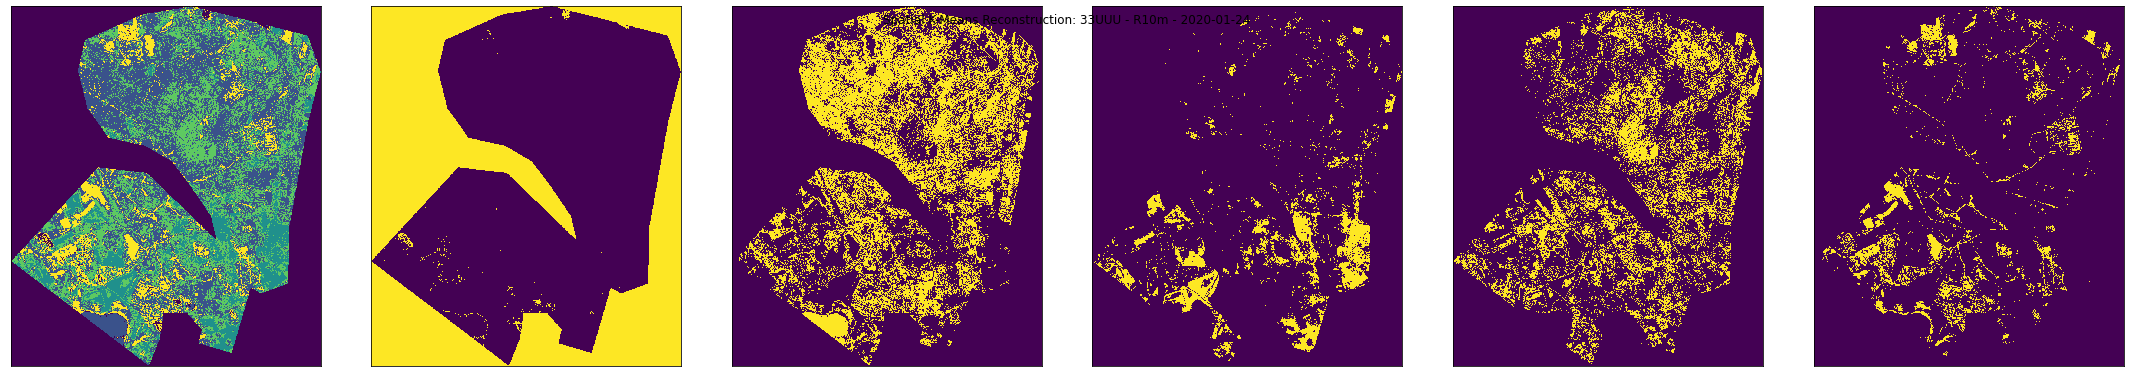

In [26]:
from kmeans_ndvi.utils import sanity_check_spatial_kmeans
scene_id = '33UUU'
res = 'R10m'
date = '2020-01-24'
image = jp2_data.scenes[scene_id][res][date]['ndvi']
kmeans = jp2_data.scenes[scene_id][res][date]['kmeans'][jp2_data.n_clusters]
sanity_check_spatial_kmeans(
    kmeans,
    image,
    jp2_data.quantile_range,
    scene_id,
    res,
    date,
    plot_now=True
)

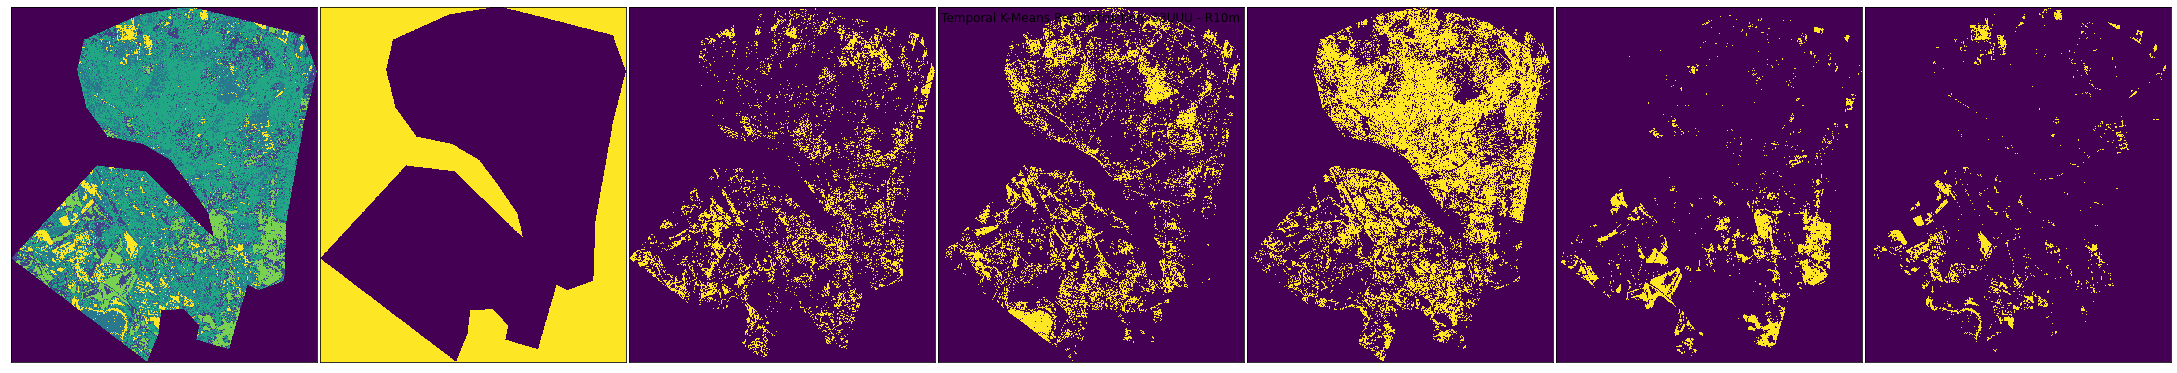

In [25]:
from kmeans_ndvi.utils import sanity_check_temporal_kmeans
scene_id = '33UUU'
res = 'R10m'
date = '2020-01-24'
image_stack = jp2_data.scenes[scene_id][res]['timeseries']['ndvi']
kmeans = jp2_data.scenes[scene_id][res]['timeseries']['kmeans'][jp2_data.n_clusters]
sanity_check_temporal_kmeans(
    kmeans,
    image_stack,
    quantile_range=jp2_data.quantile_range,
    scene_id=scene_id,
    res=res,
    plot_now=True
)